# Quantium Task1: Data Preparation and Customer Analytics

### Problem Statement: Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

# Importing required libraries

In [84]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#setting grid style for plots
sns.set(style="darkgrid")

# Performing Exploratory Data Analysis

**Importing the dataset**

In [11]:
import os
os.getcwd()

'C:\\Users\\jites'

In [12]:
os.chdir('C:\\Users\\jites\\Downloads')

In [13]:
df = pd.read_excel('QVI_transaction_data.xlsx')

**Verifying the head of the dataframe**

In [14]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [15]:
#setting the column width to max to read the description
pd.set_option('display.max_colwidth', None)

#setting the max display of output
pd.set_option('display.max_rows', None)

**We will begin by cleaning the data, followed by a detailed analysis of various factors.**

In [16]:
#Checking the shape:
df.shape

(264836, 8)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [23]:
# converting date column to normal date format
def convert_date(excel_date):
    
    timp = pd.to_datetime('1899 - 12 -30')
    delta = pd.to_timedelta(excel_date, 'D')
    return timp+delta

df['DATE'] = convert_date(df.DATE)

In [18]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [19]:
#Checking the columns:
print(list(df.columns ), end='')

['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']

# Verifying the correct data types:

In [24]:
data_type = df.dtypes
data_type

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

# Checking for Missing values and handling them

In [25]:
#Checking missing values:
df_null = df.isnull().sum().sort_values(ascending = False)
df_null.head(15)

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

**There are no null values.**

# Count of distinct values in each column

In [26]:
for i in df.columns:
    print(i, len(df[i].unique()))

DATE 364
STORE_NBR 272
LYLTY_CARD_NBR 72637
TXN_ID 263127
PROD_NBR 114
PROD_NAME 114
PROD_QTY 6
TOT_SALES 112


In [27]:
#Checking the duplicate values:
df[df.duplicated(keep = False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [28]:
#Removing the duplicate value:
df  = df.drop_duplicates()

In [29]:
#Verifying the above statement:
df.duplicated().sum()

0

# Examine the PROD_NAME

In [30]:
#Checking the number of unique product names:
df['PROD_NAME'].nunique()

114

In [31]:
#Evaluate the PROD_NAME:
df['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3185
Pringles Sweet&Spcy BBQ 134g                3177
Infuzions BBQ Rib   Prawn Crackers 110g     3174
Tyrrells Crisps     

 We will exclude any words containing digits and special characters like '&', '/' from our set of product words.

In [32]:
#Retrieve all products categorized as Chips:
chips_product = df[df['PROD_NAME'].str.contains("Chip|Chips|Chp|Chps")]
chips_product.sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
20396,2018-07-03,106,106254,108267,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8
53453,2018-07-13,242,242184,246267,47,Doritos Corn Chips Original 170g,2,8.8
108033,2019-06-29,118,118226,121962,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
27212,2018-07-14,182,182187,184460,4,Dorito Corn Chp Supreme 380g,2,13.0
96649,2018-09-28,230,230019,232007,8,Smiths Crinkle Cut Chips Original 170g,2,5.8


In [33]:
#Removing special characters:
chips_product = chips_product[chips_product['PROD_NAME'].str.contains('&|/') == False]
chips_product.shape

(48142, 8)

In [34]:
#Analyze the frequency of PROD_NAME to identify the most commonly occurring words:
chips_product['PROD_NAME'].value_counts()

Cobs Popd Sea Salt  Chips 110g             3265
Smiths Crnkle Chip  Orgnl Big Bag 380g     3233
Doritos Corn Chips  Cheese Supreme 170g    3217
Doritos Corn Chip Mexican Jalapeno 150g    3204
Dorito Corn Chp     Supreme 380g           3185
Doritos Corn Chip Southern Chicken 150g    3172
Doritos Corn Chips  Nacho Cheese 170g      3160
Tostitos Smoked     Chipotle 175g          3145
Doritos Corn Chips  Original 170g          3121
Thins Chips Seasonedchicken 175g           3114
Smiths Chip Thinly  Cut Original 175g      1614
WW Supreme Cheese   Corn Chips 200g        1509
WW Original Corn    Chips 200g             1495
Smiths Crinkle Cut  Chips Barbecue 170g    1489
WW Original Stacked Chips 160g             1487
Smiths Crinkle Cut  Chips Chicken 170g     1484
Natural Chip        Compny SeaSalt175g     1468
Smiths Crinkle Cut  Chips Original 170g    1461
Natural ChipCo      Hony Soy Chckn175g     1460
Thins Chips         Originl saltd 175g     1441
French Fries Potato Chips 175g          

Since our focus is on the Chips category, we will exclude the 'Tostitos Smoked Chipotle' products from the dataset.

In [35]:
#Removing Tostitos Smoked Chipotle product:
chips_product = chips_product.loc[chips_product['PROD_NBR'] != 90]

#Rearranging the index:
chips_product.index = range(len(chips_product))

**Next, we will generate a new column called PACK_SIZE based on the values in the PROD_NAME column and convert it to a numeric data type.**

In [36]:
#Extract the pack size information from the PROD_NAME column:
chips_product['PACK_SIZE_g'] = chips_product['PROD_NAME'].str.extract('(\d\d\d)', expand=True)

#Converting the column to numeric type:
chips_product['PACK_SIZE_g'] = pd.to_numeric(chips_product['PACK_SIZE_g'])

chips_product.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
2,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150


In [37]:
#Deleting the pack size from PROD_NAME:
chips_product['PROD_NAME'] = chips_product['PROD_NAME'].str.replace('(\d\d\d.)', '')
chips_product.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
2,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150


<AxesSubplot:xlabel='PROD_QTY'>

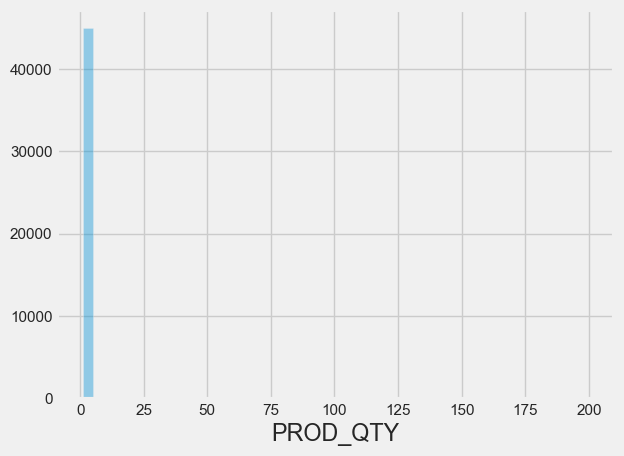

In [38]:
#Checking the outlier with the aid of scatter plot:
plt.style.use('fivethirtyeight')
sns.distplot(a = chips_product['PROD_QTY'], kde = False)

**From the plot above, it is evident that the product with a quantity of 200 is significantly distant from the other quantities.**

In [39]:
#Filter the dataset to find the outlier:
chips_product.loc[chips_product['PROD_QTY'] >= 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g
11751,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
11752,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In the dataset, we have identified two transactions in which the same customer purchased 200 packets of chips in each transaction.

In [40]:
#Let's check if the customer has had other transactions:
chips_product.loc[chips_product['LYLTY_CARD_NBR'] == 226000 ]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g
11751,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
11752,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [41]:
#Counting the number of transactions by date:
t_date = chips_product.groupby('DATE').size()
t_date

DATE
2018-07-01    103
2018-07-02    125
2018-07-03    125
2018-07-04    123
2018-07-05    137
2018-07-06    132
2018-07-07    136
2018-07-08    126
2018-07-09    121
2018-07-10    144
2018-07-11    137
2018-07-12    116
2018-07-13    125
2018-07-14    131
2018-07-15    129
2018-07-16    131
2018-07-17    137
2018-07-18    129
2018-07-19    104
2018-07-20    142
2018-07-21    114
2018-07-22    119
2018-07-23    109
2018-07-24    143
2018-07-25    120
2018-07-26    113
2018-07-27    118
2018-07-28    124
2018-07-29    132
2018-07-30    116
2018-07-31    125
2018-08-01    106
2018-08-02    114
2018-08-03    108
2018-08-04    117
2018-08-05    112
2018-08-06    147
2018-08-07    126
2018-08-08    132
2018-08-09    132
2018-08-10    119
2018-08-11    104
2018-08-12    112
2018-08-13    142
2018-08-14    138
2018-08-15    105
2018-08-16    125
2018-08-17     96
2018-08-18    129
2018-08-19    120
2018-08-20    131
2018-08-21    119
2018-08-22    120
2018-08-23    124
2018-08-24    111
2018-

Text(0.5, 1.0, 'Transactions over time')

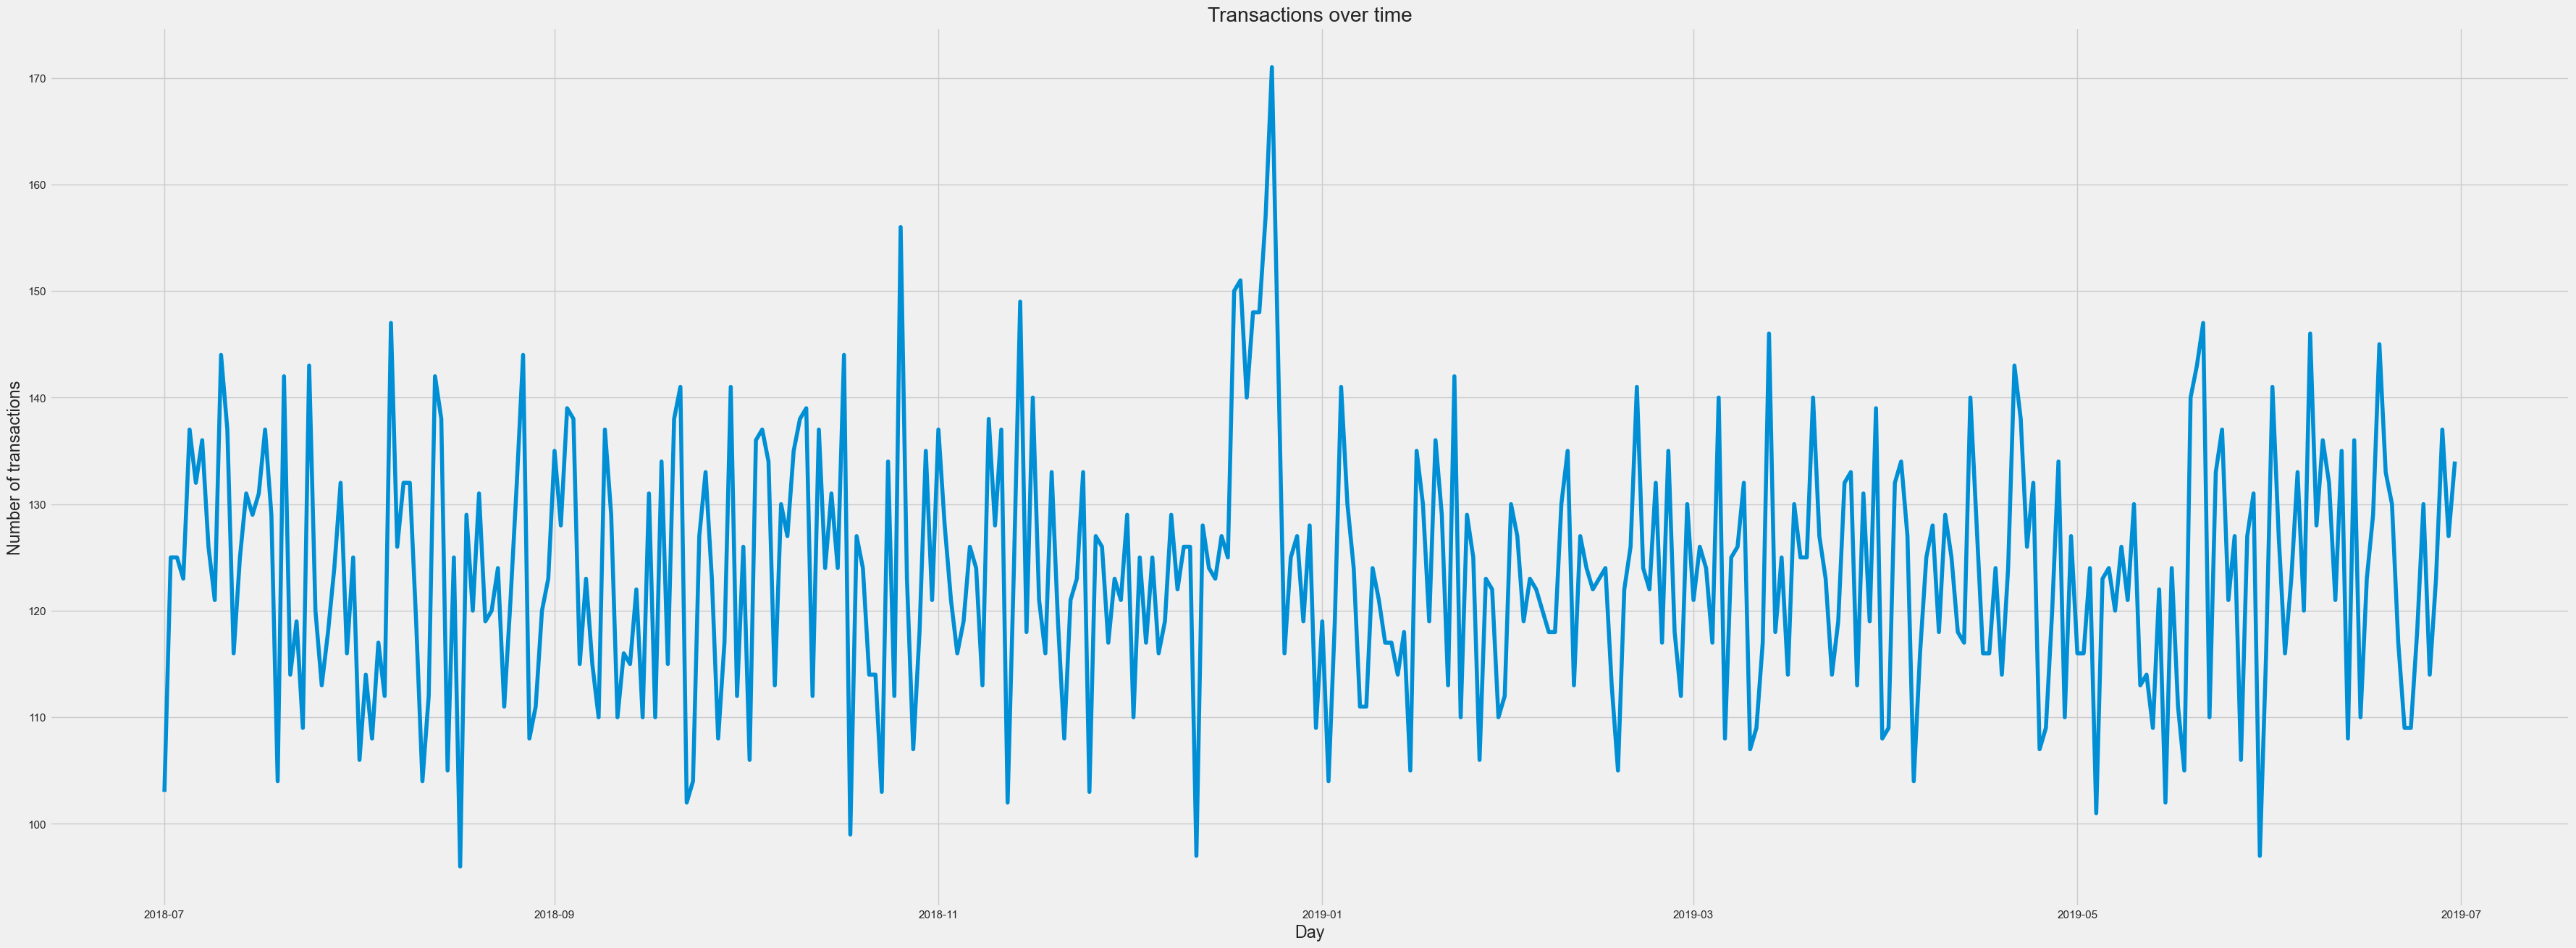

In [42]:
#Plot transactions over time:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (40,15))

sns.lineplot(x = t_date.index, y = t_date.values)
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')

In [43]:
t_month = chips_product.groupby(pd.Grouper(key = 'DATE', freq = 'M')).size()
t_month

DATE
2018-07-31    3886
2018-08-31    3748
2018-09-30    3678
2018-10-31    3880
2018-11-30    3711
2018-12-31    3857
2019-01-31    3746
2019-02-28    3442
2019-03-31    3833
2019-04-30    3690
2019-05-31    3736
2019-06-30    3790
Freq: M, dtype: int64

Text(0.5, 1.0, 'Transactions over time')

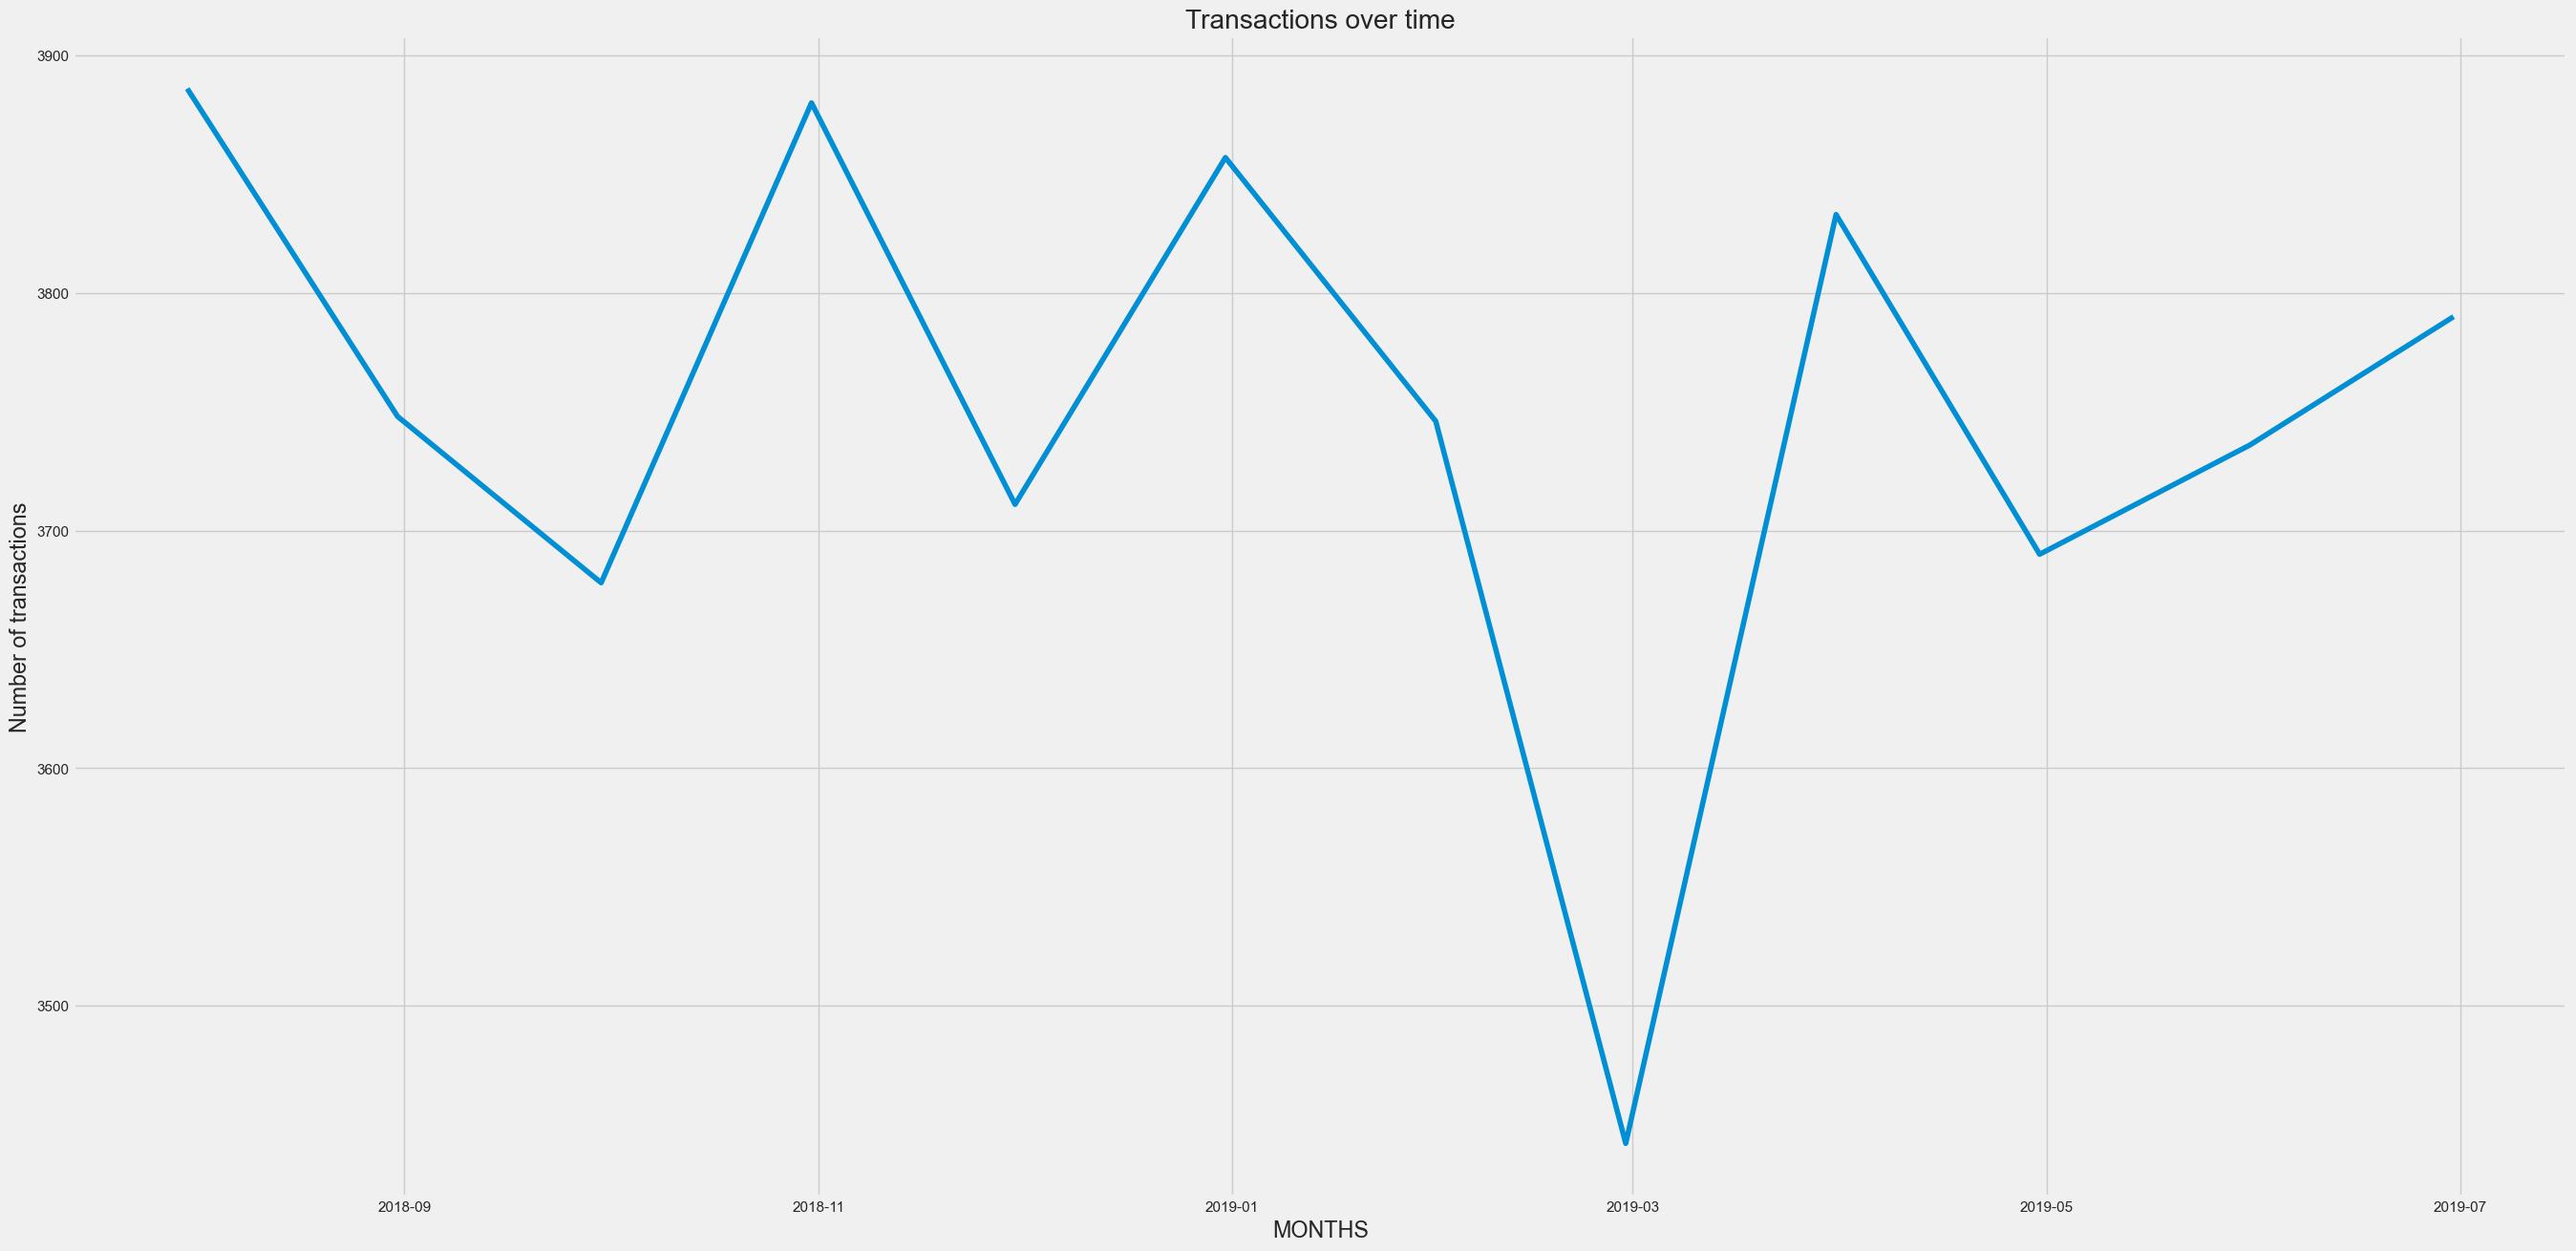

In [44]:
#Plot transaction by months:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (30,15))

sns.lineplot(x = t_month.index, y = t_month.values)
plt.xlabel('MONTHS')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')

**Observation:** Increase in purchases in December followed by a break in late December 

In [45]:
#Filter to December and look at individual days:
Dec_days = chips_product.groupby('DATE').size()

Dec_days = Dec_days["2018-12"]
Dec_days

DATE
2018-12-01    129
2018-12-02    110
2018-12-03    125
2018-12-04    117
2018-12-05    125
2018-12-06    116
2018-12-07    119
2018-12-08    129
2018-12-09    122
2018-12-10    126
2018-12-11    126
2018-12-12     97
2018-12-13    128
2018-12-14    124
2018-12-15    123
2018-12-16    127
2018-12-17    125
2018-12-18    150
2018-12-19    151
2018-12-20    140
2018-12-21    148
2018-12-22    148
2018-12-23    157
2018-12-24    171
2018-12-26    116
2018-12-27    125
2018-12-28    127
2018-12-29    119
2018-12-30    128
2018-12-31    109
dtype: int64

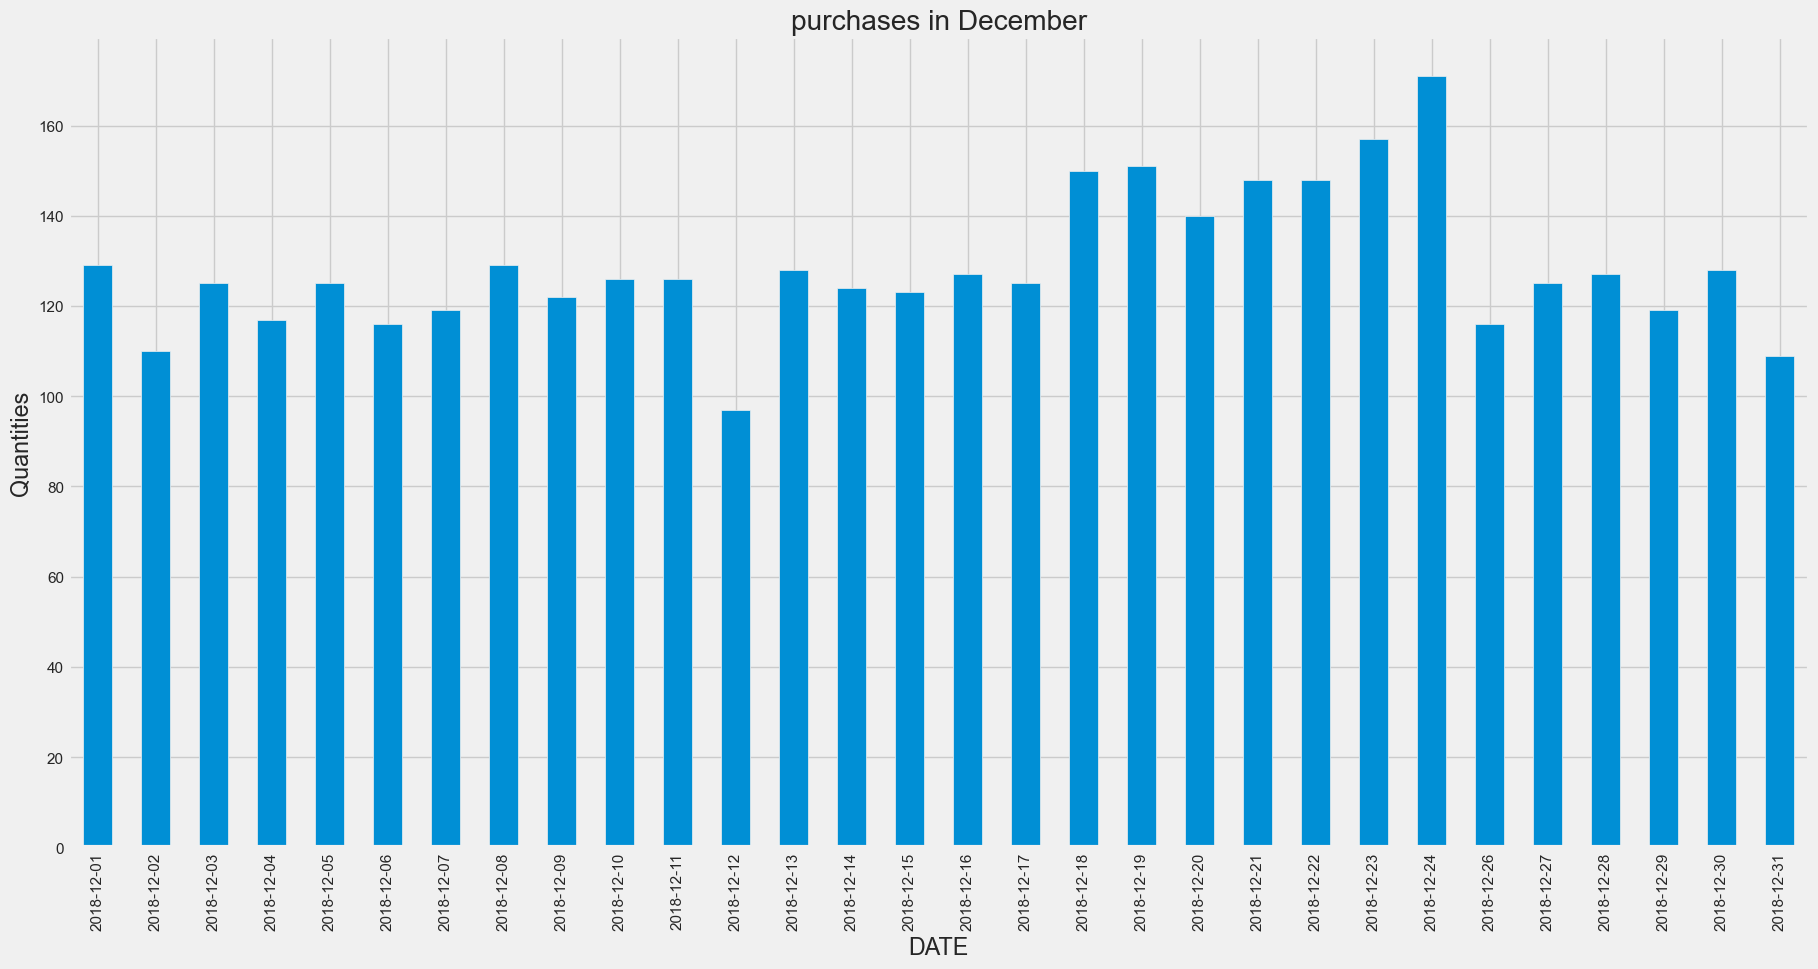

In [46]:
#Plot transactions in December:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,10))

ax = Dec_days.plot(kind = 'bar')
ax.set_title('purchases in December')
ax.set_ylabel('Quantities')
ax.set_xticklabels(Dec_days.index.strftime('%Y-%m-%d'))
plt.show()

**It is observed that sales experience a notable surge leading up to Christmas, while no sales are recorded on Christmas day. This can be attributed to the closure of shops on Christmas day, resulting in zero sales during that time.**

In [47]:
#Let's verify the pack sizes to ensure they appear reasonable and logical:
chips_product['PACK_SIZE_g'].describe()

count    44997.000000
mean       195.605818
std         77.599373
min        110.000000
25%        170.000000
50%        170.000000
75%        175.000000
max        380.000000
Name: PACK_SIZE_g, dtype: float64

**Observation:**  Largest pack_size = 380g
                  
            Smallest size = 110g

**Plot a histogram of PACK_SIZE_g since we know that it is a categorical variable and not a continuous variable even though it is numeric.**

Text(0.5, 1.0, 'The number of transactions by pack size.')

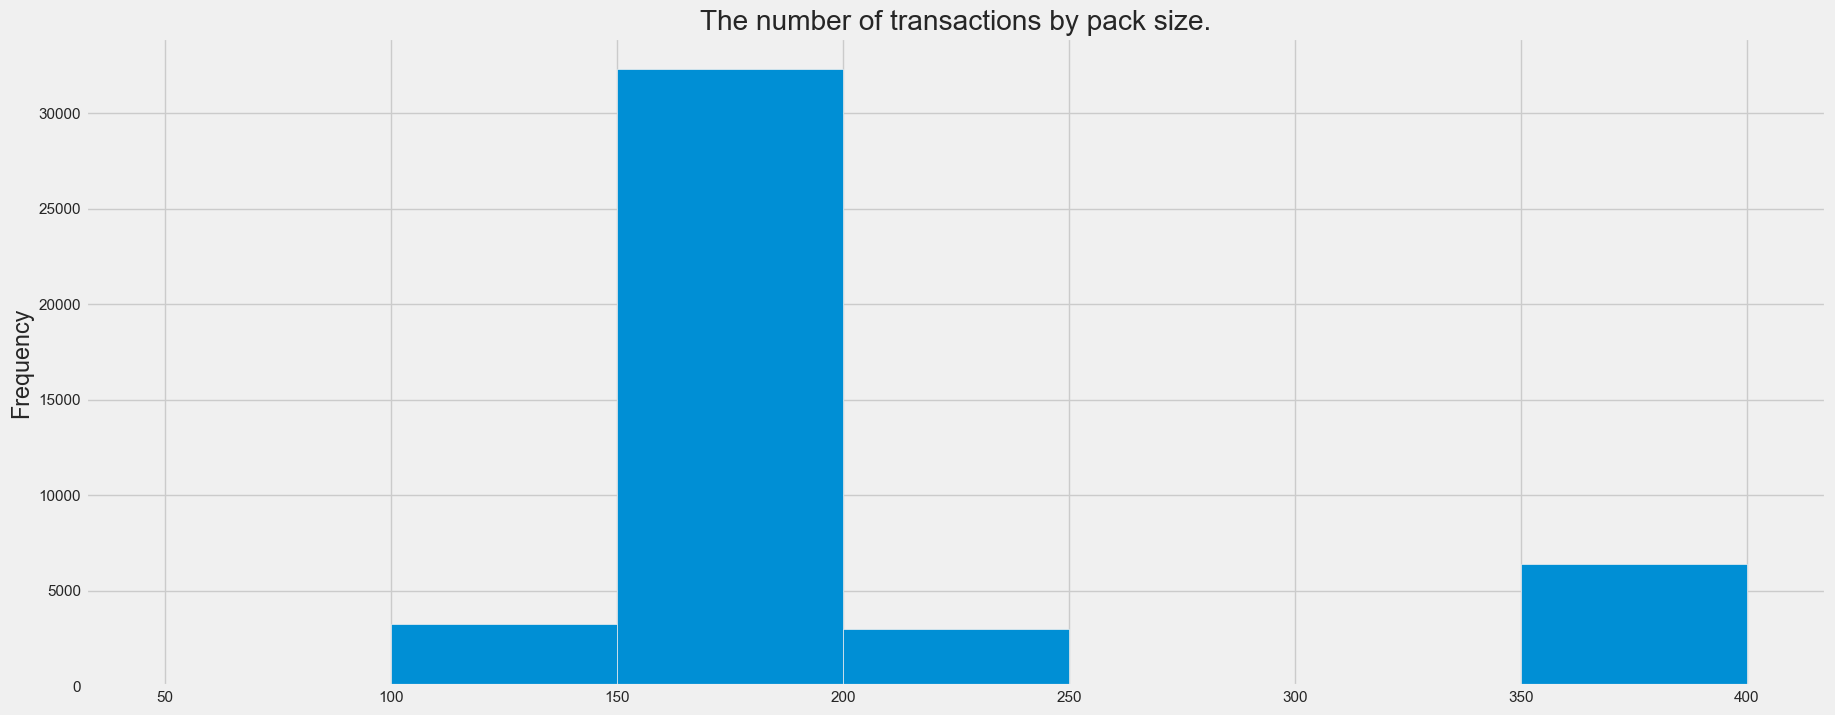

In [48]:
#Plot a histogram of PACK_SIZE:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,8))

bins = [50, 100, 150, 200, 250, 300,350,400]
chips_product['PACK_SIZE_g'].plot(kind = 'hist', bins = bins)
plt.title('The number of transactions by pack size.')

**Observation:** Highest number of transactions by pack size - Range - 150 to 200

**Let's create brands, we can use the first word in PROD_NAME to work out the brand name**

In [50]:
#Brand Column:
chips_product['BRAND_NAME'] = chips_product['PROD_NAME'].str.split().str.get(0)
chips_product.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
2,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150,Doritos
3,2018-08-17,22,22456,18696,93,Doritos Corn Chip Southern Chicken,1,3.9,150,Doritos
4,2018-08-19,39,39167,35638,111,Smiths Chip Thinly Cut Original,2,6.0,175,Smiths


In [51]:
#Check the brand_name:
chips_product['BRAND_NAME'].value_counts()

Doritos    15874
Smiths      9281
Thins       4555
WW          4491
Cobs        3265
Dorito      3185
Natural     2928
French      1418
Name: BRAND_NAME, dtype: int64

In [52]:
chips_product['BRAND_NAME'] = chips_product['BRAND_NAME'].replace('Dorito', 'Doritos')
chips_product['BRAND_NAME'].value_counts()

Doritos    19059
Smiths      9281
Thins       4555
WW          4491
Cobs        3265
Natural     2928
French      1418
Name: BRAND_NAME, dtype: int64

Text(0.5, 1.0, 'BRANDS NAME')

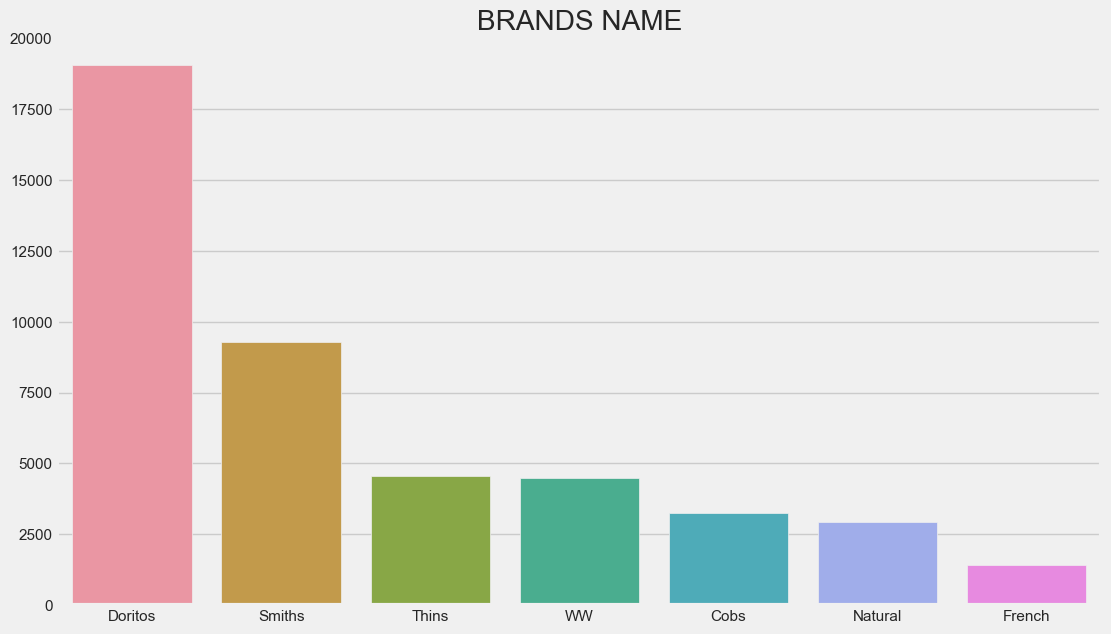

In [53]:
#Visualizing the brand name:
brand = chips_product['BRAND_NAME'].value_counts()

plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
plt.tight_layout()
sns.barplot(x = brand.index,  y = brand.values)
plt.title('BRANDS NAME')

**Observation:** Largest Brand - Doritos followed by Smiths 

# EVALUATING CUSTOMER DATA

In [54]:
df_1 = pd.read_csv('QVI_purchase_behaviour.csv')
df_1.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [55]:
#Checking the info:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [56]:
#Checking the size of the data:
nrows, ncols = df_1.shape

In [58]:
#Check for missing values:
df_1.isnull().values.any()

False

In [59]:
#Checking the duplicate values:
df_1.duplicated('LYLTY_CARD_NBR').sum()

0

**Check the 'LIFESTAGE' column**

In [60]:
#Check the number of unique values in 'LIFESTAGE' column:
df_1['LIFESTAGE'].nunique()

7

In [61]:
#Display all the unique values with their count:
df_1['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

Text(0.5, 1.0, 'CUSTOMERS LIFESTAGE')

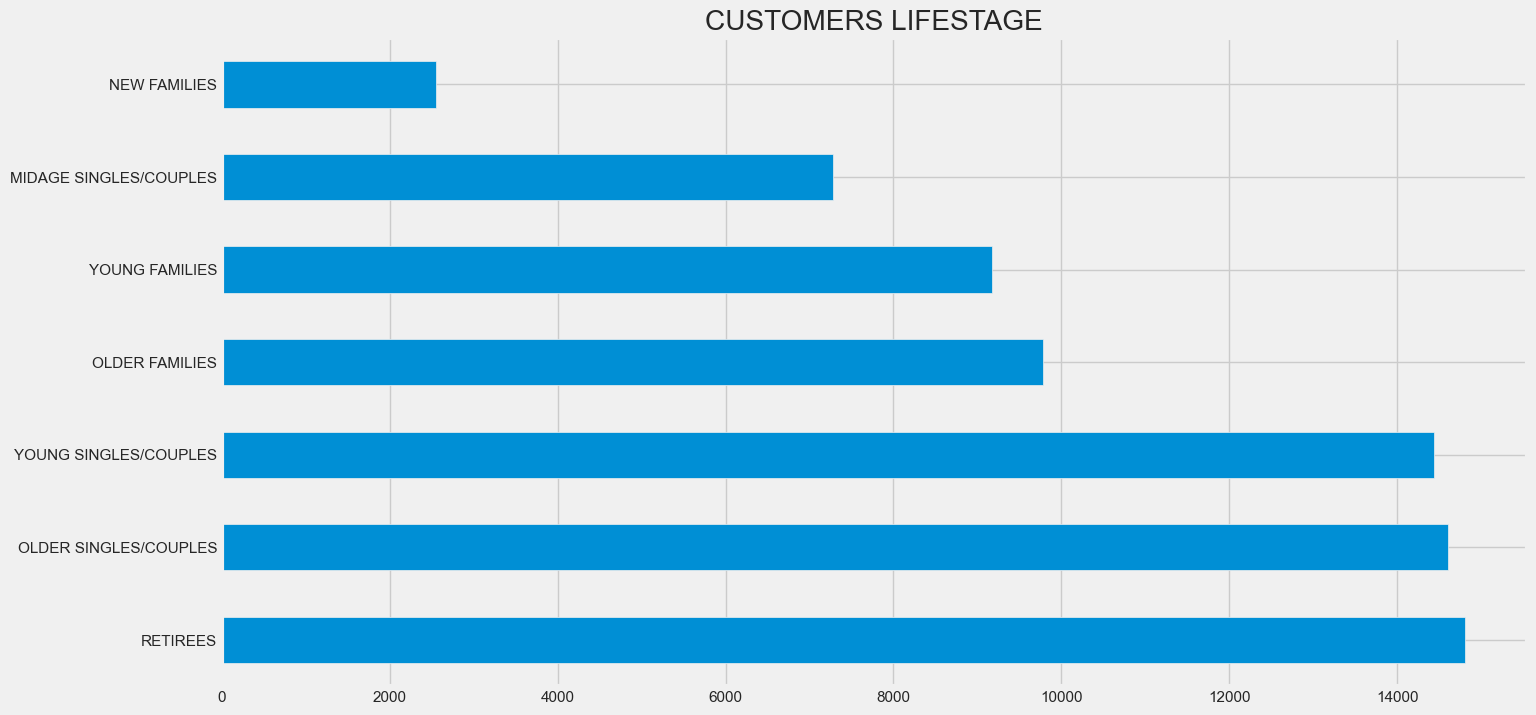

In [62]:
#Visualizing the lifestage column:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15, 8))
lifestage = df_1['LIFESTAGE'].value_counts()
lifestage.plot(kind = 'barh')
plt.title('CUSTOMERS LIFESTAGE')

**Check the 'PREMIUM_CUSTOMER' column**

In [63]:
#Number of unique values:
df_1['PREMIUM_CUSTOMER'].nunique()

3

In [64]:
df_1['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

Text(0.5, 1.0, 'PREMIUM_CUSTOMERS')

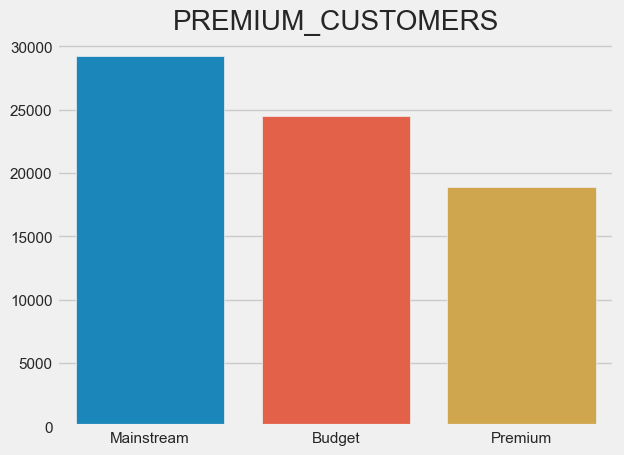

In [65]:
#Visualizing Customer_premium
prem = df_1['PREMIUM_CUSTOMER'].value_counts()

plt.style.use('fivethirtyeight')
sns.barplot(x = prem.index, y = prem.values)
plt.title('PREMIUM_CUSTOMERS')

# Merging transaction data to customer data:

In [66]:
#Merge transaction data to customer data, i.e, chips_product and df_1
data = chips_product.merge(df_1, how = 'left', on = 'LYLTY_CARD_NBR')
data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150,Doritos,MIDAGE SINGLES/COUPLES,Budget


In [67]:
#Checking the size:
chips_product.shape

(44997, 10)

In [68]:
data.shape

(44997, 12)

In [69]:
#Checking for null values:
data.isnull().values.any()

False

In [70]:
#Saving our data to csv file for further analysis:
data.to_csv('Quantium_data.csv', index = False)

# Data analysis on customer segments

In [71]:
data = pd.read_csv('Quantium_data.csv')
data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE_g,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150,Doritos,MIDAGE SINGLES/COUPLES,Budget


**Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by these segments to describe which customer segment contribute most to chip sales.**

In [72]:
#Total sales by LIFESTAGE and PREMIUM_CUSTOMER
tot_sales_lif_prem = data.groupby(['PREMIUM_CUSTOMER', 
                                   'LIFESTAGE'])['TOT_SALES'].sum().sort_values(ascending = False).to_frame('SUM_SALES').reset_index()
tot_sales_lif_prem

,PREMIUM_CUSTOMER,LIFESTAGE,SUM_SALES
0,Budget,OLDER FAMILIES,28233.35
1,Mainstream,YOUNG SINGLES/COUPLES,26502.00
2,Mainstream,RETIREES,26067.95
3,Budget,YOUNG FAMILIES,24274.95
4,Mainstream,OLDER SINGLES/COUPLES,23464.10
5,Budget,OLDER SINGLES/COUPLES,23306.90
6,Premium,OLDER SINGLES/COUPLES,22694.95
7,Budget,RETIREES,19399.00
8,Mainstream,OLDER FAMILIES,17710.55
9,Mainstream,YOUNG FAMILIES,16193.05


Text(0.5, 1.0, 'Total sales by LIFESTAGE and PREMIUM_CUSTOMER')

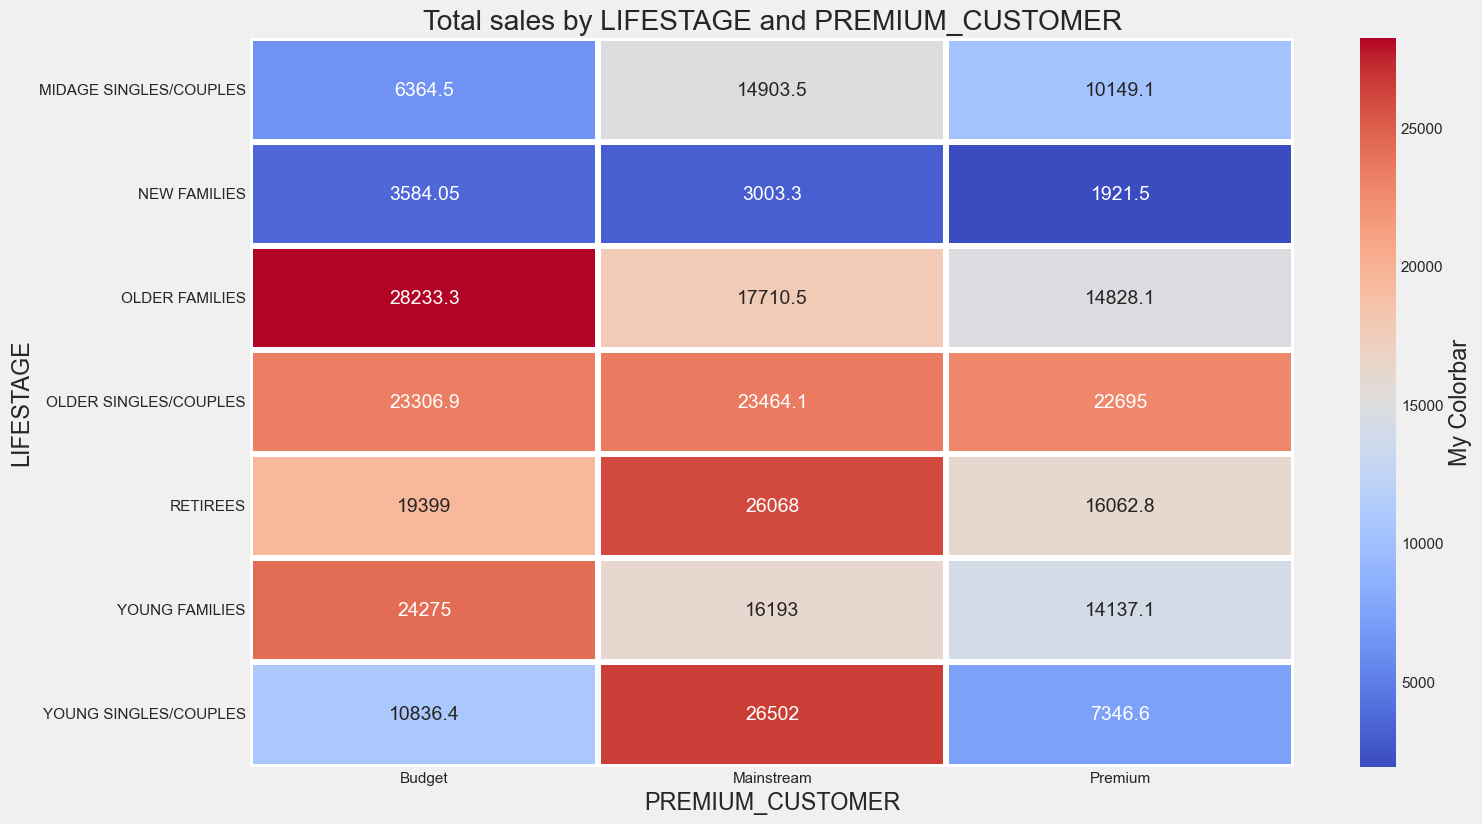

In [73]:
#pandas pivot
heatmap1_data = pd.pivot_table(tot_sales_lif_prem, values= 'SUM_SALES', index= 'LIFESTAGE', columns= 'PREMIUM_CUSTOMER')
#heatmap1_data 

plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,9))

sns.heatmap(heatmap1_data, annot = True, cmap= 'coolwarm', fmt='g', linewidths=3, cbar_kws={'label': 'My Colorbar'})
plt.title('Total sales by LIFESTAGE and PREMIUM_CUSTOMER')

**Calculate the summary of number of customers by those dimensions and create a plot.**

In [74]:
# Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
count_sales_lif_prem = data.groupby(['PREMIUM_CUSTOMER', 
                                     'LIFESTAGE'])['TOT_SALES'].count().sort_values(ascending = False).to_frame('COUNT_SALES').reset_index()
count_sales_lif_prem

,PREMIUM_CUSTOMER,LIFESTAGE,COUNT_SALES
0,Budget,OLDER FAMILIES,3866
1,Mainstream,RETIREES,3563
2,Mainstream,YOUNG SINGLES/COUPLES,3459
3,Budget,YOUNG FAMILIES,3324
4,Mainstream,OLDER SINGLES/COUPLES,3188
5,Budget,OLDER SINGLES/COUPLES,3151
6,Premium,OLDER SINGLES/COUPLES,3054
7,Budget,RETIREES,2595
8,Mainstream,OLDER FAMILIES,2422
9,Mainstream,YOUNG FAMILIES,2246


Text(0.5, 1.0, 'Number of customers by LIFESTAGE and PREMIUM_CUSTOMER')

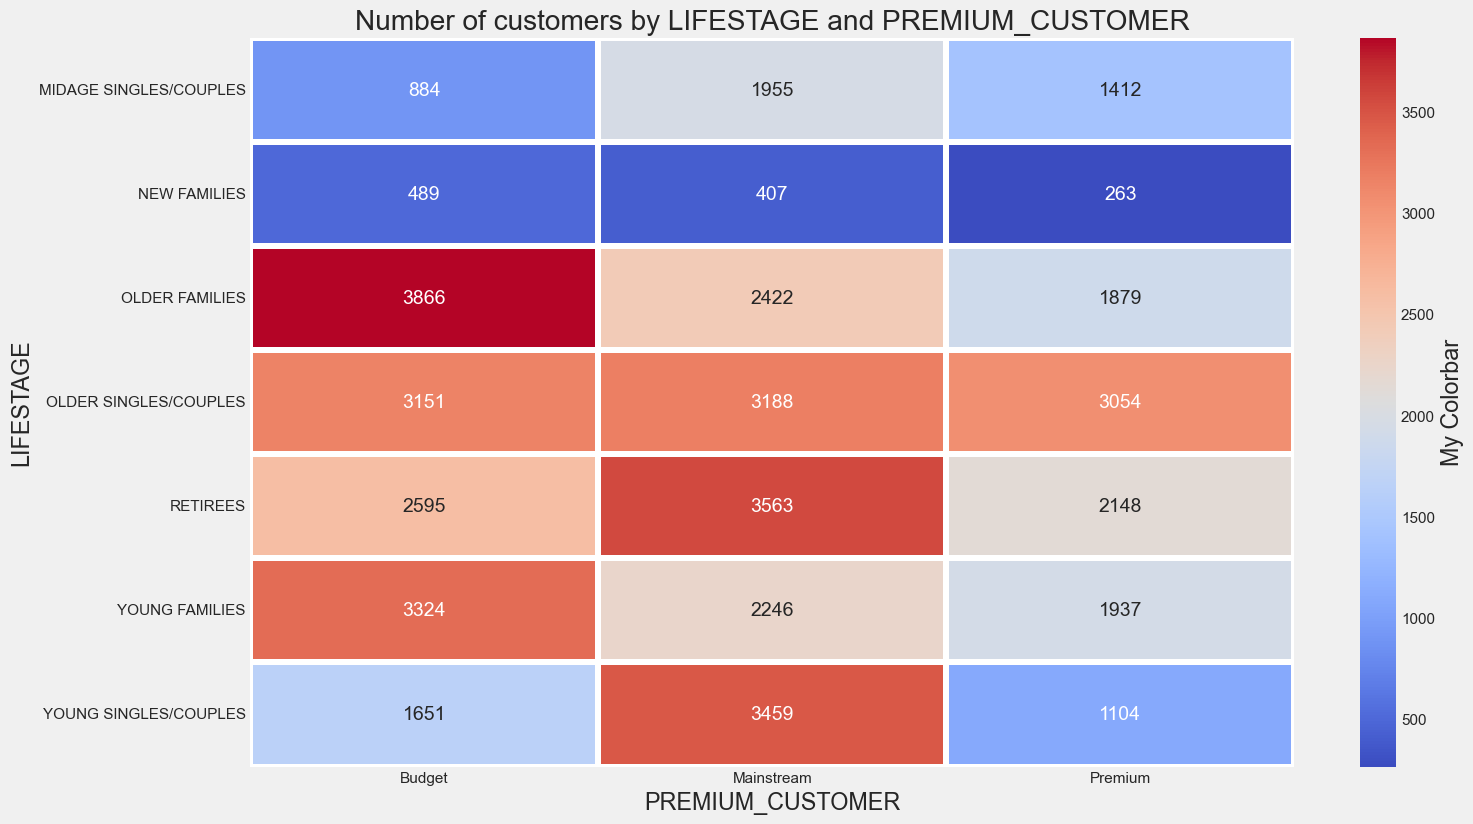

In [75]:
#Pandas pivot
heatmap_data = pd.pivot_table(count_sales_lif_prem, values= 'COUNT_SALES', index= 'LIFESTAGE', columns= 'PREMIUM_CUSTOMER')
#heatmap1_data 

plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,9))

sns.heatmap(heatmap_data, annot = True, cmap= 'coolwarm', fmt='g', linewidths=3, cbar_kws={'label': 'My Colorbar'})
plt.title('Number of customers by LIFESTAGE and PREMIUM_CUSTOMER')

**Calculate the average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER**

In [76]:
# Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_lif_pre = data.groupby(['PREMIUM_CUSTOMER', 
                            'LIFESTAGE'])['PROD_QTY'].mean().sort_values(ascending = False).to_frame('AVG_UNIT').reset_index()
avg_lif_pre

,PREMIUM_CUSTOMER,LIFESTAGE,AVG_UNIT
0,Premium,OLDER FAMILIES,2.165514
1,Mainstream,OLDER FAMILIES,1.944674
2,Budget,OLDER FAMILIES,1.941800
3,Budget,YOUNG FAMILIES,1.941035
4,Mainstream,YOUNG FAMILIES,1.939893
5,Premium,YOUNG FAMILIES,1.928756
6,Mainstream,MIDAGE SINGLES/COUPLES,1.918670
7,Premium,OLDER SINGLES/COUPLES,1.914866
8,Mainstream,OLDER SINGLES/COUPLES,1.913425
9,Budget,OLDER SINGLES/COUPLES,1.908600


Text(0.5, 1.0, 'The average number of units per customer')

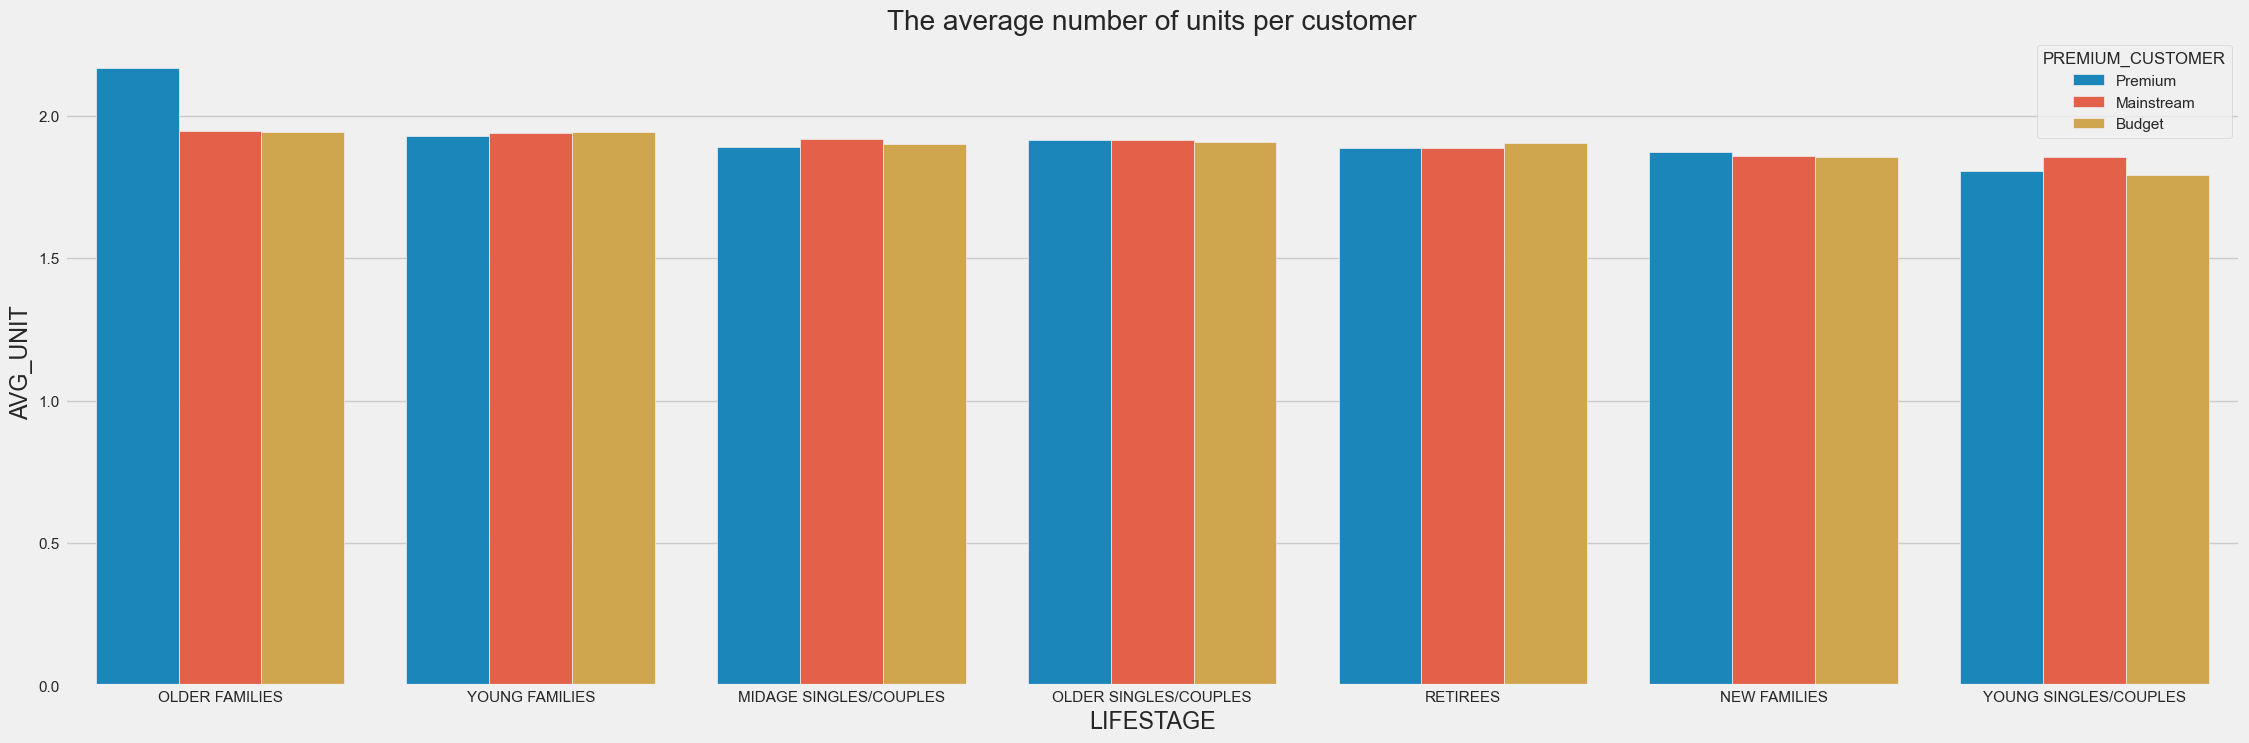

In [77]:
#Plot the average number of units per customer 
plt.style.use('fivethirtyeight')
plt.figure(figsize = (25,8))

sns.barplot(x="LIFESTAGE", y = "AVG_UNIT", hue="PREMIUM_CUSTOMER", data= avg_lif_pre)
plt.title('The average number of units per customer')

In [78]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_sales_lif_prem = data.groupby(['PREMIUM_CUSTOMER', 
                                     'LIFESTAGE'])['TOT_SALES'].mean().sort_values(ascending = False).to_frame('AVG_SALES').reset_index()
avg_sales_lif_prem

,PREMIUM_CUSTOMER,LIFESTAGE,AVG_SALES
0,Premium,OLDER FAMILIES,7.891485
1,Mainstream,YOUNG SINGLES/COUPLES,7.661752
2,Mainstream,MIDAGE SINGLES/COUPLES,7.623248
3,Premium,RETIREES,7.478003
4,Budget,RETIREES,7.475530
5,Premium,OLDER SINGLES/COUPLES,7.431221
6,Budget,OLDER SINGLES/COUPLES,7.396668
7,Mainstream,NEW FAMILIES,7.379115
8,Mainstream,OLDER SINGLES/COUPLES,7.360132
9,Budget,NEW FAMILIES,7.329346


Text(0.5, 1.0, 'Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER')

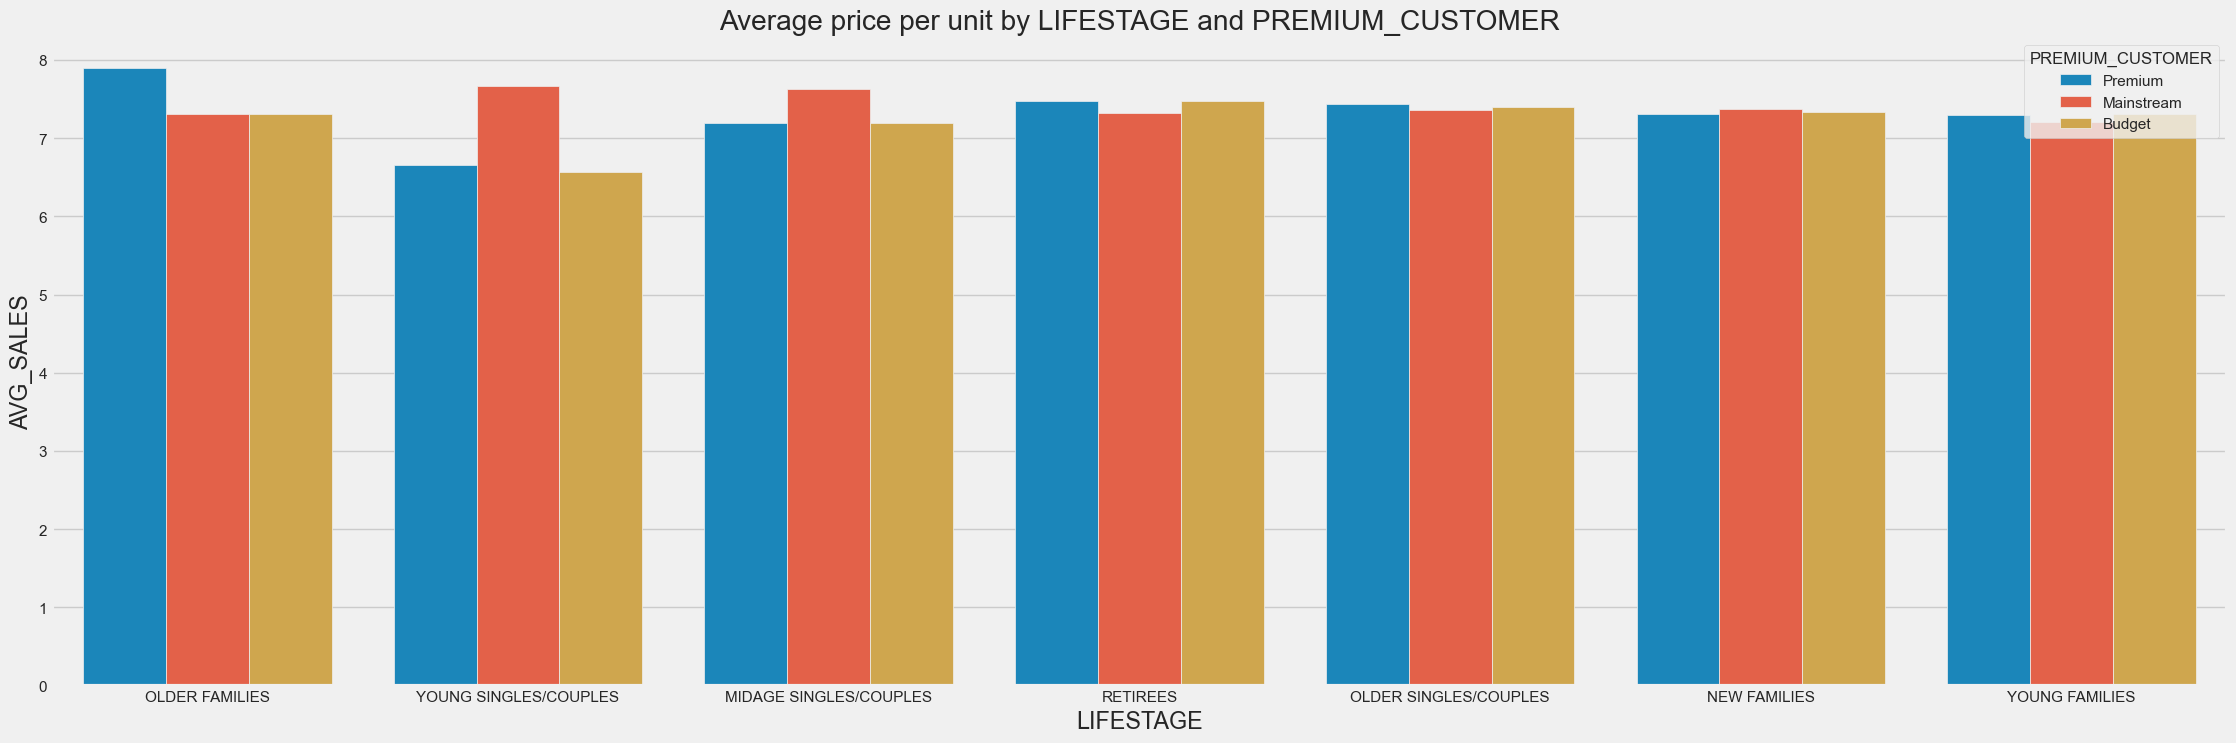

In [79]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
plt.style.use('fivethirtyeight')
plt.figure(figsize = (25,8))

sns.barplot(x="LIFESTAGE", y = "AVG_SALES", hue="PREMIUM_CUSTOMER", data= avg_sales_lif_prem)
plt.title('Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER')

**Mainstream mid-age and young singles and couples demonstrate a greater willingness to pay a higher price per packet of chips compared to their budget-conscious and premium counterparts. This could be attributed to premium shoppers' inclination towards healthier snack options. When they do purchase chips, it is primarily for entertainment purposes rather than personal consumption. Additionally, the data suggests that there are fewer premium mid-age and young singles and couples buying chips in comparison to their mainstream counterparts.**

**Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples**

In [80]:
# Perform a t-test to see if the difference is significant:
avg_sales_lif_prem.head(3)

,PREMIUM_CUSTOMER,LIFESTAGE,AVG_SALES
0,Premium,OLDER FAMILIES,7.891485
1,Mainstream,YOUNG SINGLES/COUPLES,7.661752
2,Mainstream,MIDAGE SINGLES/COUPLES,7.623248


In [81]:
#Let's change this dataframe to pivot table for easy application of t_test:
avg_pivot_tab = avg_sales_lif_prem.pivot_table(values = 'AVG_SALES', index = 'LIFESTAGE', columns =  'PREMIUM_CUSTOMER')
avg_pivot_tab

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,7.199661,7.623248,7.187783
NEW FAMILIES,7.329346,7.379115,7.306084
OLDER FAMILIES,7.302988,7.312366,7.891485
OLDER SINGLES/COUPLES,7.396668,7.360132,7.431221
RETIREES,7.475530,7.316292,7.478003
YOUNG FAMILIES,7.302933,7.209728,7.298451
YOUNG SINGLES/COUPLES,6.563537,7.661752,6.654529


In [82]:
#Removing mainstream vs premium and budget midage and young singles/couples from the table:
ttes = avg_pivot_tab.loc[['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES']]
ttes

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,7.199661,7.623248,7.187783
YOUNG SINGLES/COUPLES,6.563537,7.661752,6.654529


In [85]:
#mainstream vs Budget t_test
tt_M_B = scipy.stats.ttest_ind(ttes['Mainstream'], ttes['Budget'])
tt_M_B

Ttest_indResult(statistic=2.387936167304628, pvalue=0.13957263521843824)

In [86]:
#mainstream vs premium t_test
tt_M_P = scipy.stats.ttest_ind(ttes['Mainstream'], ttes['Premium'])
tt_M_P

Ttest_indResult(statistic=2.698415340538475, pvalue=0.11427074115568982)

**Observation:** Based on the t-test analysis, the obtained p-value of 0.140 indicates that the unit price for mainstream, young and mid-age singles and couples is not significantly higher compared to the unit price for budget or premium, young and mid-age singles and couples.